## Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import datetime as dt

## Analysing the given data

In [2]:
data = pd.read_csv('ecommerce.csv',encoding="ISO-8859-1")
separator = '\n*******************************\n'
print(data.info())
print(separator)
print(data.describe())
print(separator)
print(data.head(5))
print(separator)
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

*******************************

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
7

In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(data.info())
print(separator)
print(data.isnull().sum().sort_values(ascending = False))
print(separator)
print((data.isnull().sum().sort_values(ascending = False))/len(data)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

*******************************

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

*******************************

CustomerID     24.926694
Description     0.268

#### Data before and after dropping null values.

In [4]:
print('Shape of data before dropping null values :')
print(data.shape)
print('Shape of data after dropping null values :')
data.dropna(axis = 0, inplace = True)
print(data.shape)

Shape of data before dropping null values :
(541909, 8)
Shape of data after dropping null values :
(406829, 8)


# Exploratory Data Analysis

D:\DataScience\lib\site-packages\seaborn\distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
D:\DataScience\lib\site-packages\seaborn\distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


Text(0, 0.5, 'Probablity Density')

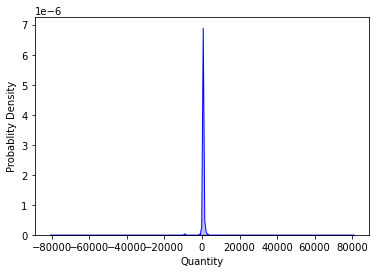

In [5]:
x_values = data['Quantity']

sns.kdeplot(x_values, color='b', shade=True, Label='Quantity') 
  
# Setting the X and Y Label 
plt.xlabel('Quantity') 
plt.ylabel('Probablity Density')

#### Countries through which most of the orders were placed :

Now we will look at the details of the countries through which most of the orders were placed : 
                      InvoiceNo
Country                        
United Kingdom           361878
Germany                    9495
France                     8491
EIRE                       7485
Spain                      2533
Netherlands                2371
Belgium                    2069
Switzerland                1877
Portugal                   1480
Australia                  1259
Norway                     1086
Italy                       803
Channel Islands             758
Finland                     695
Cyprus                      622
Sweden                      462
Austria                     401
Denmark                     389
Japan                       358
Poland                      341
USA                         291
Israel                      250
Unspecified                 244
Singapore                   229
Iceland                     182
Canada                      151
Greece 

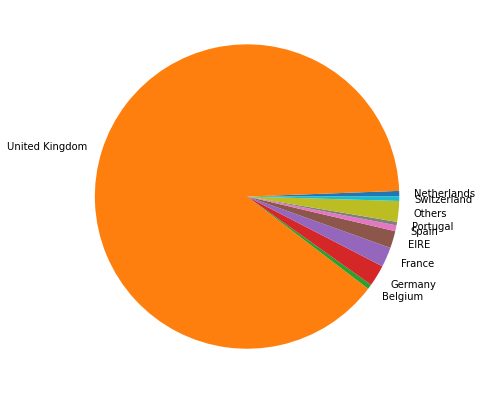

In [7]:
print('Now we will look at the details of the countries through which most of the orders were placed : ')
print(data[['InvoiceNo','Country']].groupby('Country').count().sort_values("InvoiceNo",ascending = False))

print('\n\n Creating a Pie Chart to Visualize the the data better :')

country = ['Netherlands','United Kingdom', 'Belgium','Germany', 'France' , 'EIRE'  , 'Spain'    , 'Portugal'  , 'Others','Switzerland']
invoice = [2363,354345,2031,9042,8342,7238,2485 ,1462,8774,1842]

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(invoice, labels = country) 
  
# show plot 
plt.show()

#### We see that the dataset is largely dominated by orders made from the UK.

## Which Items were bought more often ?

In [8]:
items = data['Description'].value_counts().head()
print(items)

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Description, dtype: int64


D:\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(4, 0, 'PARTY BUNTING'),
  Text(5, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(7, 0, 'POSTAGE'),
  Text(8, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(9, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(10, 0, 'SPOTTY BUNTING'),
  Text(11, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(12, 0, 'LUNCH BAG SPACEBOY DESIGN '),
  Text(13, 0, 'LUNCH BAG CARS BLUE'),
  Text(14, 0, 'NATURAL SLATE HEART CHALKBOARD ')])

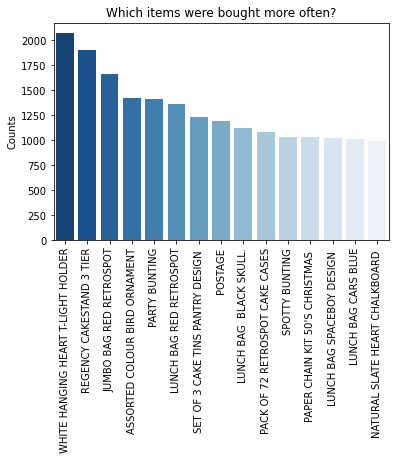

In [9]:
item_counts = data['Description'].value_counts().sort_values(ascending=False).head(15)
sns.barplot(item_counts.index, item_counts.values,palette = "Blues_r")
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90)

#### Let's find the largest amount order.

In [10]:
data['TotalQuantity'] = data['Quantity']*data['UnitPrice']
data[data['TotalQuantity']==data['TotalQuantity'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6


### Inference: Since the given website is a United Kindom originated website. All the variables such as No. of Customers and the Gross total sales is dominated by the United Kingdom. The remaning portion is occupied by the neighbouring Europian Countries.